# Some Parameters

In [1]:
data_file = 'BostonHousing.csv'
target_col = 'medv'

# Data Discovery and Preparation

## Data Frame

In [20]:
import pandas as pd
df = pd.read_csv(data_file)

df.head()


crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

## Checking null values (No null values were found)

In [19]:
print(df[target_col].isnull().values.any()) # Checking null values on the prices column
print(df.isnull().sum().any()) # Checking null values on all the columns

False
False


## Data Correlation
In this step we are checking the correlation between the columns in the dataset. 
Sometimes we could remove redundant features.

<Axes: >

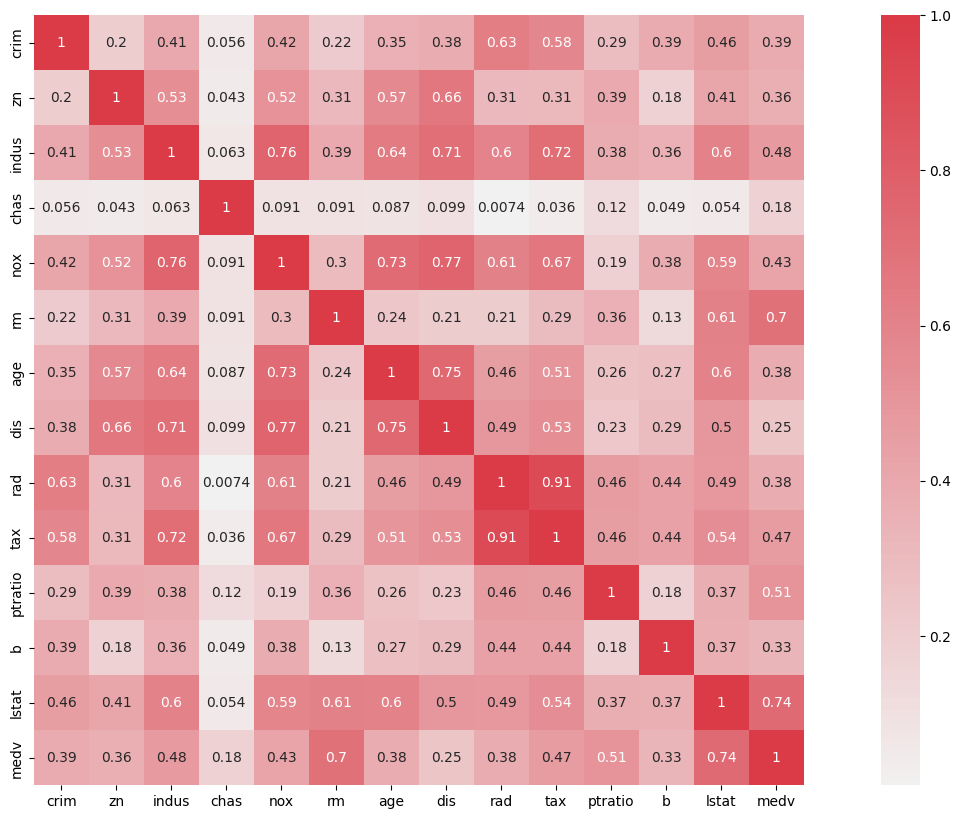

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
cmap = sns.diverging_palette(500, 10, as_cmap=True)
sns.heatmap(df.corr().abs(), cmap=cmap, center=0, square=True, annot=True)

We could find out that: 
- TAX and RAD are highly correlated.
- LSTAT, RM, NOX, INDUS, PRTAIO, and TAX have a high correlation with price, which encourages using these features for training.

## Features and Prices Relationship

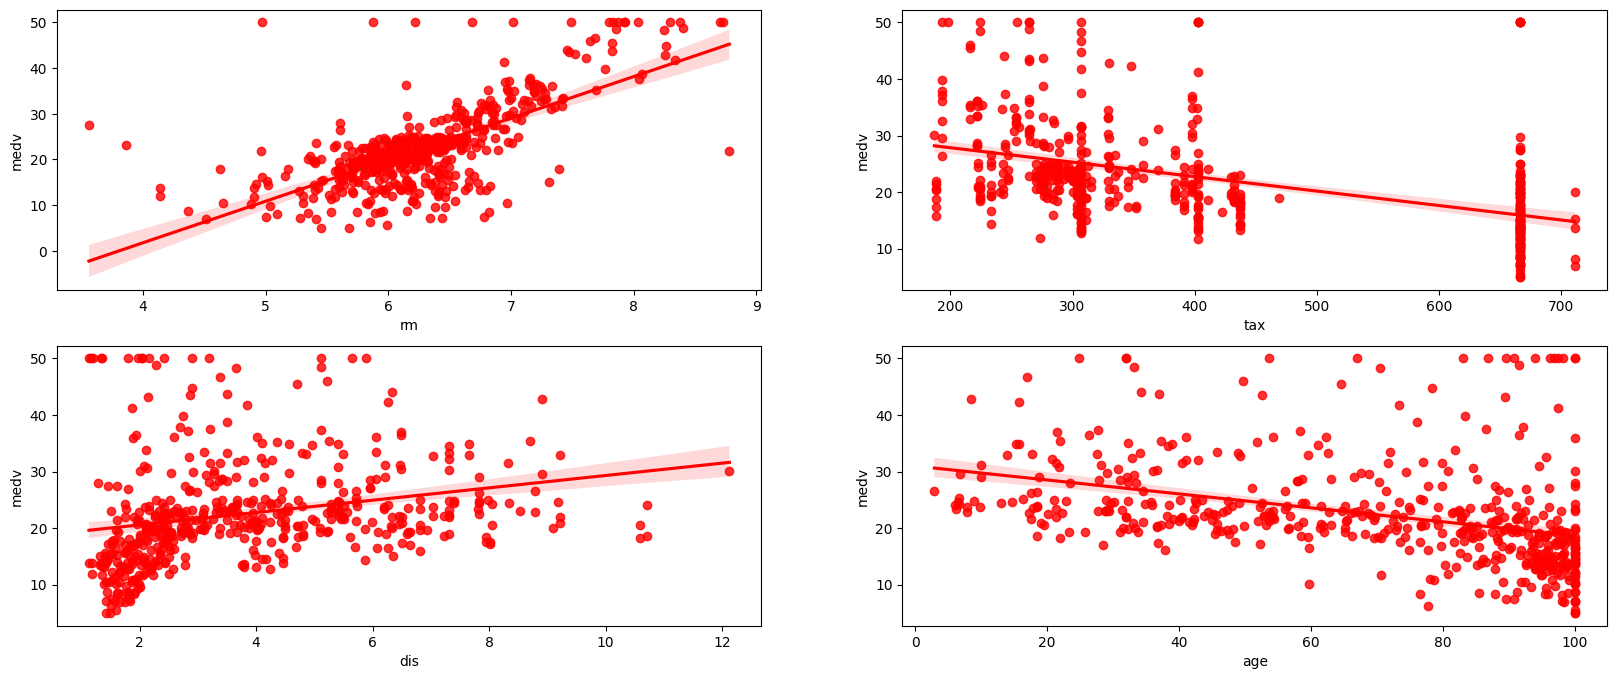

In [6]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,8))
cols = ['rm', 'tax', 'dis', 'age']
for col, ax in zip(cols, axs.flat):
    sns.regplot(x = df[col],y = df[target_col], color = 'red', ax=ax)

Some features show a positive relationship to the house prices, others show a negative relationship.

## Data Preparation

In [9]:
from ml_utils import train_model, evaluate_model
from data_utils import prepare_data

X_train, y_train, X_test, y_test = prepare_data(df, target_col)

# Machine Learning Models

## Linear Regression

In [10]:
model_type = "LinearRegression"
with_search_params = False
output_model = "LinearRegressionModel.model"

model = train_model(model_type, with_search_params, output_model, X_train, y_train, X_test, y_test)
evaluate_model(model, X_train, y_train, X_test, y_test)

Training model ...
Training is complete.
Saving model into LinearRegressionModel.model
R2 score on train data :
0.7440943579806478
R2 score on test data :
0.6349093310755483


# Support Vector Regressor

In [11]:
model_type = "SVR"
with_search_params = True
output_model = "SVRModel.model"

model = train_model(model_type, with_search_params, output_model, X_train, y_train, X_test, y_test)
evaluate_model(model, X_train, y_train, X_test, y_test)

Hyper-parameter tuning started ..
Hyper-parameters tuning is complete.
Score : -0.077 , Parameters : {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
Score : -0.053 , Parameters : {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Score : 0.126 , Parameters : {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Score : 0.422 , Parameters : {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Score : 0.496 , Parameters : {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
Score : 0.585 , Parameters : {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
Score : 0.593 , Parameters : {'C': 1, 'gamma': 0.6, 'kernel': 'rbf'}
Score : 0.605 , Parameters : {'C': 1, 'gamma': 0.9, 'kernel': 'rbf'}
Score : -0.053 , Parameters : {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
Score : 0.129 , Parameters : {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Score : 0.446 , Parameters : {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Score : 0.688 , Parameters : {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Score : 0.729 , Parameters : {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
Score : 0.77

# Decision Tree

In [12]:
model_type = "DecisionTree"
with_search_params = True
output_model = "DecisionTree.model"

model = train_model(model_type, with_search_params, output_model, X_train, y_train, X_test, y_test)
evaluate_model(model, X_train, y_train, X_test, y_test)

Hyper-parameter tuning started ..
Hyper-parameters tuning is complete.
Score : 0.730 , Parameters : {'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'splitter': 'best'}
Score : 0.684 , Parameters : {'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'splitter': 'random'}
Score : 0.574 , Parameters : {'criterion': 'squared_error', 'max_depth': None, 'max_features': 'sqrt', 'splitter': 'best'}
Score : 0.620 , Parameters : {'criterion': 'squared_error', 'max_depth': None, 'max_features': 'sqrt', 'splitter': 'random'}
Score : 0.685 , Parameters : {'criterion': 'squared_error', 'max_depth': None, 'max_features': 'log2', 'splitter': 'best'}
Score : 0.364 , Parameters : {'criterion': 'squared_error', 'max_depth': None, 'max_features': 'log2', 'splitter': 'random'}
Score : 0.630 , Parameters : {'criterion': 'squared_error', 'max_depth': 2, 'max_features': None, 'splitter': 'best'}
Score : 0.423 , Parameters : {'criterion': 'squared_error', 'max_depth'

# Random Forest

In [13]:
model_type = "RandomForest"
with_search_params = True
output_model = "RandomForest.model"

model = train_model(model_type, with_search_params, output_model, X_train, y_train, X_test, y_test)
evaluate_model(model, X_train, y_train, X_test, y_test)

Hyper-parameter tuning started ..
Hyper-parameters tuning is complete.
Score : 0.687 , Parameters : {'max_depth': 2, 'n_estimators': 10}
Score : 0.686 , Parameters : {'max_depth': 2, 'n_estimators': 20}
Score : 0.699 , Parameters : {'max_depth': 2, 'n_estimators': 30}
Score : 0.704 , Parameters : {'max_depth': 2, 'n_estimators': 40}
Score : 0.698 , Parameters : {'max_depth': 2, 'n_estimators': 50}
Score : 0.700 , Parameters : {'max_depth': 2, 'n_estimators': 100}
Score : 0.699 , Parameters : {'max_depth': 2, 'n_estimators': 150}
Score : 0.698 , Parameters : {'max_depth': 2, 'n_estimators': 200}
Score : 0.795 , Parameters : {'max_depth': 4, 'n_estimators': 10}
Score : 0.814 , Parameters : {'max_depth': 4, 'n_estimators': 20}
Score : 0.822 , Parameters : {'max_depth': 4, 'n_estimators': 30}
Score : 0.818 , Parameters : {'max_depth': 4, 'n_estimators': 40}
Score : 0.819 , Parameters : {'max_depth': 4, 'n_estimators': 50}
Score : 0.825 , Parameters : {'max_depth': 4, 'n_estimators': 100}
S

# Summary

- SVR model gave the best results on the test set.
- Random forests gave the best results on the train test. However, that might be overfitting.

- I believe the best model to tackle this data is the support vector regressor.

- We could use some better libraries for hyper-parameter tuning.